In [103]:
# Load data
puzzle_input = [6,13,1,15,2,0]
test_input = [0,3,6] #436

In [122]:
# Puzzle 1

def get_nth(input, n):
    number_history = []
    for k in range(0, n):
        if k < len(input):
            spoken_number = input[k]
        else:
            if not spoken_number in number_history[:-1]:
                spoken_number = 0
            else:
                last_time = number_history[::-1].index(spoken_number)
                second_last_time = number_history[::-1].index(spoken_number, last_time+1)
                spoken_number = second_last_time - last_time
        number_history.append(spoken_number)
    #print(number_history)
    return spoken_number, number_history

assert get_nth(test_input, 2020)[0] == 436
get_nth(puzzle_input, 2020)[0]

1194

In [133]:
# Puzzle 2
# Store numbers in dict with last time they were spoken (k), should help with speed and a bit with memory

def get_nth_alt(input, n):
    numbers = {}
    spoken_number = 0

    for k in range(0, n):
        #print(k, numbers)
        #print(k, numbers_prev)
        spoken_number_prev = spoken_number
        if k < len(input):
            spoken_number = input[k]
        else:
            if not spoken_number in numbers.keys():
                spoken_number = 0
            else:
                spoken_number = k - 1 - numbers[spoken_number]
        if k > 0:
            numbers[spoken_number_prev] = k - 1
        #print("Spoken", spoken_number)
    return spoken_number

assert get_nth_alt(test_input, 2020) == 436
get_nth_alt(puzzle_input, 2020)

1194

In [134]:
# Puzzle 2
# Does not scale linearly, 8/15s? for 100000, 80s for 300000
# With improvement (single dict, no copying): 0.13s for 3e5, 1.5s for 3e6, 17s for 3e7
import time
t = time.time()
print(get_nth_alt(puzzle_input, 30000000))
elapsed = time.time() - t
print(elapsed)

48710
18.375358819961548


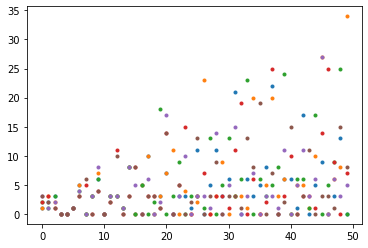

In [87]:
# Plotting
import matplotlib.pyplot as plt
from itertools import permutations

perms = permutations([1,2,3], 3)

for p in perms:
    y = get_nth(p, 50)[1]
    plt.plot(y,'.')